<a href="https://colab.research.google.com/github/susanjax/Project_Genetic_Algorithm/blob/main/part_2_lazy_predict_ML_model_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
#use transformed data
df = pd.read_csv('/content/drive/MyDrive/toxicity_project/data/transformed/scaled_original_material_cell.csv')
df

,Unnamed: 0,tissue,cell line,disease,material,morphology,cell type,organism,test,amw,...,mcd,CrippenClogP,Valance_electron,chi1v,chi2v,electronegativity,Zeta potential (mV),kappa1,chi0v,viability (%)
0,0,4.00,0.00,11.00,2.00,8.00,1.00,0.00,10.00,0.84,...,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.02,-0.20,-0.27,36.13
1,1,4.00,0.00,11.00,2.00,8.00,1.00,0.00,10.00,0.84,...,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.84,-0.20,-0.27,22.25
2,2,4.00,0.00,11.00,2.00,8.00,1.00,0.00,10.00,0.84,...,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.78,-0.20,-0.27,19.64
3,3,4.00,0.00,11.00,2.00,8.00,1.00,0.00,10.00,0.84,...,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.37,-0.20,-0.27,91.26
4,4,4.00,0.00,11.00,2.00,8.00,1.00,0.00,10.00,0.84,...,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,0.95,-0.20,-0.27,87.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3024,3111,5.00,73.00,2.00,6.00,11.00,0.00,4.00,10.00,0.55,...,0.64,0.06,-0.08,1.58,-0.25,0.37,-1.04,-0.10,0.83,63.25
3025,3112,5.00,73.00,2.00,6.00,11.00,0.00,4.00,10.00,0.55,...,0.64,0.06,-0.08,1.58,-0.25,0.37,-0.11,-0.10,0.83,102.63
3026,3113,5.00,73.00,2.00,6.00,11.00,0.00,4.00,10.00,0.55,...,0.64,0.06,-0.08,1.58,-0.25,0.37,1.01,-0.10,0.83,107.88
3027,3114,5.00,73.00,2.00,6.00,11.00,0.00,4.00,10.00,0.55,...,0.64,0.06,-0.08,1.58,-0.25,0.37,-0.13,-0.10,0.83,106.44


In [4]:
# Perform data splitting using 80/20 ratio
X = df.drop(['Unnamed: 0','material','viability (%)'], axis=1) 
Y = df[['viability (%)']].copy()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [5]:
X_train

,tissue,cell line,disease,morphology,cell type,organism,test,amw,lipinskiHBD,CrippenMR,...,NumHBA,mcd,CrippenClogP,Valance_electron,chi1v,chi2v,electronegativity,Zeta potential (mV),kappa1,chi0v
1613,17.00,4.00,1.00,2.00,1.00,0.00,11.00,-0.55,-0.15,-0.37,...,0.56,1.18,0.05,-0.08,0.56,-0.25,0.83,-0.02,-0.13,-0.04
2430,12.00,28.00,12.00,2.00,1.00,0.00,13.00,1.25,-0.15,0.05,...,1.96,0.25,-0.37,2.27,1.58,0.76,0.65,1.24,0.20,1.68
1963,10.00,60.00,3.00,3.00,0.00,6.00,10.00,-0.53,-0.15,-0.53,...,-0.14,-0.00,0.32,-0.67,0.41,-0.25,-0.02,-1.18,-0.17,0.62
7,4.00,0.00,11.00,8.00,1.00,0.00,10.00,0.84,-0.15,-0.69,...,-0.85,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.05,-0.20,-0.27
693,13.00,33.00,1.00,2.00,1.00,0.00,10.00,0.84,-0.15,-0.69,...,-0.85,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,0.95,-0.20,-0.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,7.00,15.00,0.00,2.00,1.00,0.00,0.00,-0.78,-0.15,0.98,...,0.56,1.95,-0.78,-0.08,0.20,-0.25,1.22,-0.97,-0.15,-0.35
1095,2.00,41.00,3.00,3.00,0.00,4.00,10.00,-1.35,-0.15,0.07,...,-0.85,-0.87,0.76,-0.97,-0.78,-0.25,-0.01,-0.18,-0.28,-1.35
1130,6.00,44.00,0.00,2.00,1.00,0.00,10.00,-0.78,-0.15,0.98,...,0.56,1.95,-0.78,-0.08,0.20,-0.25,1.22,2.13,-0.15,-0.35
1294,9.00,51.00,3.00,3.00,0.00,4.00,9.00,0.84,-0.15,-0.69,...,-0.85,-0.87,0.58,-0.45,-0.78,-0.25,-0.04,-0.97,-0.20,-0.27


In [6]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
train,test = clf.fit(X_train, X_test, Y_train, Y_test)

 93%|█████████▎| 39/42 [08:48<00:57, 19.24s/it]

[15:33:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


100%|██████████| 42/42 [08:49<00:00, 12.61s/it]


In [7]:
train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.69,0.71,16.67,0.20
HistGradientBoostingRegressor,0.69,0.70,16.84,6.80
RandomForestRegressor,0.67,0.68,17.28,1.76
BaggingRegressor,0.64,0.66,17.93,0.23
ExtraTreesRegressor,0.63,0.64,18.40,1.38
GradientBoostingRegressor,0.52,0.54,20.82,0.86
XGBRegressor,0.51,0.53,21.01,0.34
KNeighborsRegressor,0.50,0.52,21.25,0.15
DecisionTreeRegressor,0.46,0.49,22.03,0.11


In [15]:
train_mod = train.iloc[:-5 , :]
train_mod.to_csv('Model_comparision_train.csv')

In [16]:
train_mod

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.69,0.71,16.67,0.20
HistGradientBoostingRegressor,0.69,0.70,16.84,6.80
RandomForestRegressor,0.67,0.68,17.28,1.76
BaggingRegressor,0.64,0.66,17.93,0.23
ExtraTreesRegressor,0.63,0.64,18.40,1.38
GradientBoostingRegressor,0.52,0.54,20.82,0.86
XGBRegressor,0.51,0.53,21.01,0.34
KNeighborsRegressor,0.50,0.52,21.25,0.15
DecisionTreeRegressor,0.46,0.49,22.03,0.11


In [18]:
test_mod = test.iloc[:-5 , :]

test_mod.to_csv('Model_comparision_test.csv')

In [19]:
test_mod

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.69,0.71,16.67,0.20
HistGradientBoostingRegressor,0.69,0.70,16.84,6.80
RandomForestRegressor,0.67,0.68,17.28,1.76
BaggingRegressor,0.64,0.66,17.93,0.23
ExtraTreesRegressor,0.63,0.64,18.40,1.38
GradientBoostingRegressor,0.52,0.54,20.82,0.86
XGBRegressor,0.51,0.53,21.01,0.34
KNeighborsRegressor,0.50,0.52,21.25,0.15
DecisionTreeRegressor,0.46,0.49,22.03,0.11


#Data Visualization


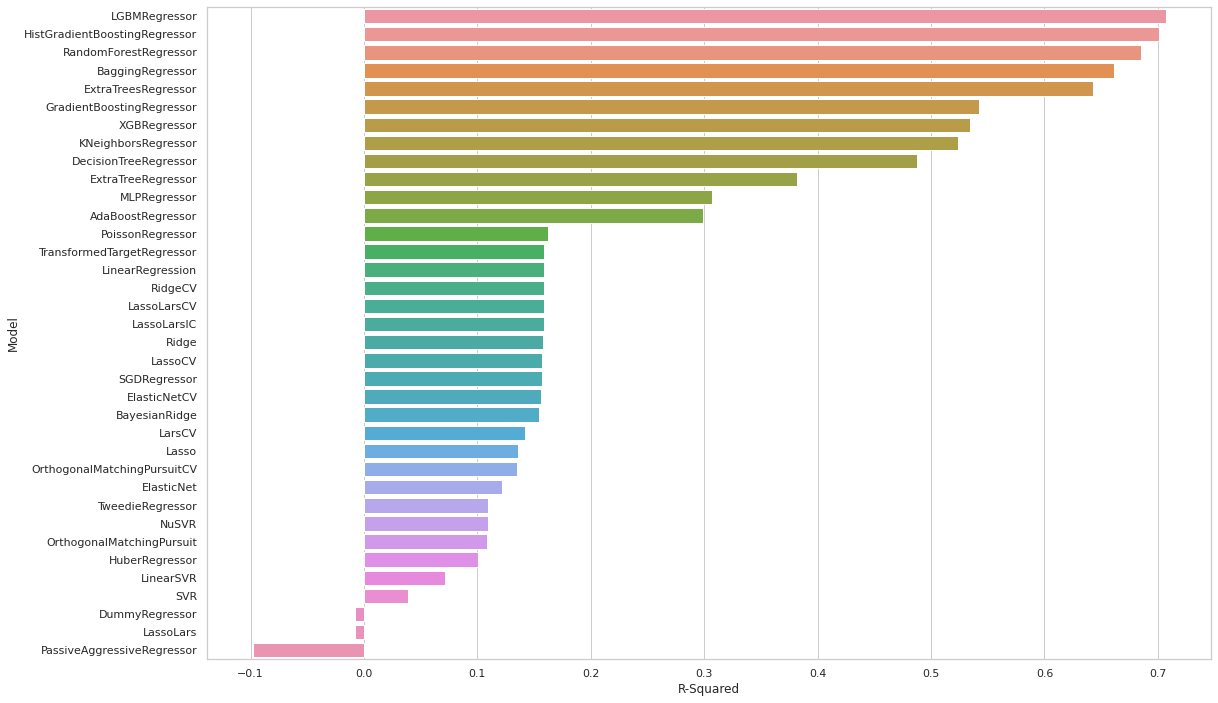

In [20]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(18, 12))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_mod.index, x="R-Squared", data=train_mod)
# ax.set(xlim=(0, 1))
plt.savefig('models_r_square.png')

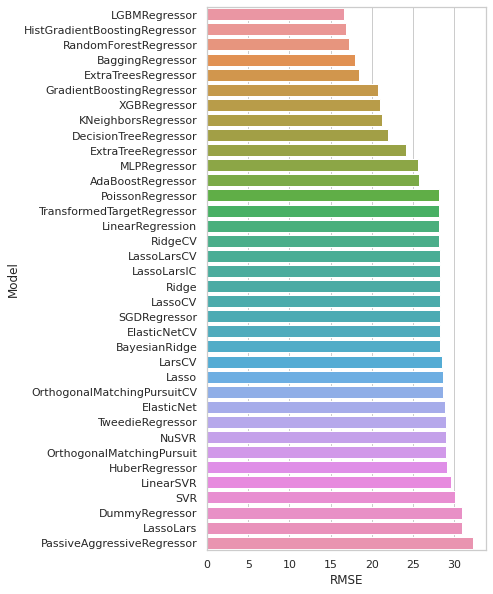

In [21]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train_mod.index, x="RMSE", data=train_mod)
# ax.set(xlim=(0, 1))
plt.savefig('models_rmse.png')

[(0.0, 5.0)]

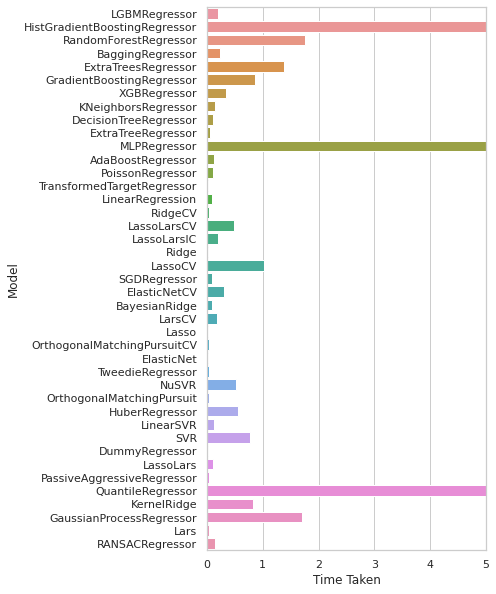

In [14]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=train.index, x="Time Taken", data=train)
ax.set(xlim=(0, 5))